# Decision Tree modeling

##### Import libraries and data

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, precision_score, recall_score

# import data
train = pd.read_csv("train.csv")
val = pd.read_csv("val.csv")

# get categorical columns
cat_cols = []
for col in train.columns:
    if (train[col].nunique() < 10) & (col != "target"):
        cat_cols.append(col)
        
# get dummies
dummies = pd.DataFrame([])
for col in cat_cols:
    dummy_col = pd.get_dummies(train[col], prefix=col, drop_first=True)
    dummies = pd.concat([dummies, dummy_col], axis=1)

# replace columns with dummies
train_dummies = train.copy()
train_dummies.drop(cat_cols, axis=1, inplace=True)
train_set = pd.concat([train_dummies, dummies], axis=1)

# remove unecessary features
train_set.drop(["fbs_1", "cp_3", "restecg_2", "ca_4"], axis=1, inplace=True)
 
# get dummies
dummies = pd.DataFrame([])
for col in cat_cols:
    dummy_col = pd.get_dummies(val[col], prefix=col, drop_first=True)
    dummies = pd.concat([dummies, dummy_col], axis=1)

# replace columns with dummies
val_dummies = val.copy()
val_dummies.drop(cat_cols, axis=1, inplace=True)
val_set = pd.concat([val_dummies, dummies], axis=1)


train_set.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,restecg_1,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3
0,68,120,211,115,1.5,1,0,0,1,0,0,1,0,0,0,0,0,1,0
1,60,140,185,155,3.0,0,1,0,1,0,0,1,0,0,0,0,0,1,0
2,51,110,175,123,0.6,1,1,0,1,1,0,0,1,0,0,0,0,1,0
3,57,124,261,141,0.3,0,1,1,0,1,0,0,1,0,0,0,0,0,1
4,56,120,236,178,0.8,1,1,1,0,1,0,0,1,0,0,0,0,1,0


# 1. Split X and y

In [2]:
X = train.drop("target", axis=1)
y = train.target
cols = X.columns

X_val = val.drop("target", axis=1)
y_val = val.target

# 2. Scaling

In [3]:
sc = StandardScaler()
X = sc.fit_transform(X)
X_val = sc.transform(X_val)

X = pd.DataFrame(X, columns=cols)
X_val = pd.DataFrame(X_val, columns=cols)

# 3. Hyperparameter tuning

In [5]:
params = {
    "max_depth":[2, 3, 4, None],
    "min_samples_leaf":[2, 3, 4]
}

gs = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv=5)
gs.fit(X, y)

C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, None],
                         'min_samples_leaf': [2, 3, 4]},
             pre_dispatc

In [6]:
gs.best_params_

{'max_depth': 3, 'min_samples_leaf': 4}

In [7]:
model1 = gs.best_estimator_

# Performance Metrics

In [8]:
model1.fit(X, y)
train_pred = model1.predict(X)
y_pred = model1.predict(X_val)

print("training scores")
print(classification_report(y, train_pred))
print('\n validation scores')
print(classification_report(y_val, y_pred))

training scores
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       114
           1       0.87      0.85      0.86       130

    accuracy                           0.85       244
   macro avg       0.85      0.85      0.85       244
weighted avg       0.85      0.85      0.85       244


 validation scores
              precision    recall  f1-score   support

           0       0.60      0.75      0.67         8
           1       0.89      0.80      0.84        20

    accuracy                           0.79        28
   macro avg       0.74      0.78      0.75        28
weighted avg       0.81      0.79      0.79        28



## Feature importances

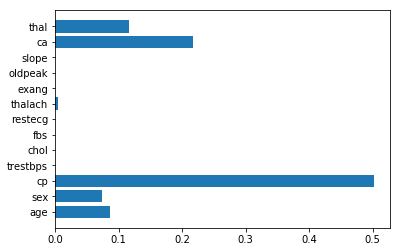

In [9]:
plt.barh(X.columns, model1.feature_importances_)
plt.show()

## Remodeling with less features

In [10]:
X_t = pd.concat([X.thal, X.ca, X.cp, X.sex, X.age], axis=1)
X_val_t = pd.concat([X_val.thal, X_val.ca, X_val.cp, X_val.sex, X_val.age], axis=1)

# Hyperparameter tuning

In [11]:
params = {
    "max_depth":[2, 3, 4, None],
    "min_samples_leaf":[2, 3, 4]
}

gs = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv=5)
gs.fit(X_t, y)

C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, None],
                         'min_samples_leaf': [2, 3, 4]},
             pre_dispatc

In [12]:
gs.best_params_

{'max_depth': 3, 'min_samples_leaf': 2}

In [13]:
model2 = gs.best_estimator_

# Performance Metrics

In [14]:
model2.fit(X_t, y)
train_pred = model2.predict(X_t)
y_pred = model2.predict(X_val_t)

print("training scores")
print(classification_report(y, train_pred))
print('\n validation scores')
print(classification_report(y_val, y_pred))

training scores
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       114
           1       0.87      0.85      0.86       130

    accuracy                           0.85       244
   macro avg       0.85      0.85      0.85       244
weighted avg       0.85      0.85      0.85       244


 validation scores
              precision    recall  f1-score   support

           0       0.60      0.75      0.67         8
           1       0.89      0.80      0.84        20

    accuracy                           0.79        28
   macro avg       0.74      0.78      0.75        28
weighted avg       0.81      0.79      0.79        28



## Precision Recall Tradeoff

C:\Users\zasz\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


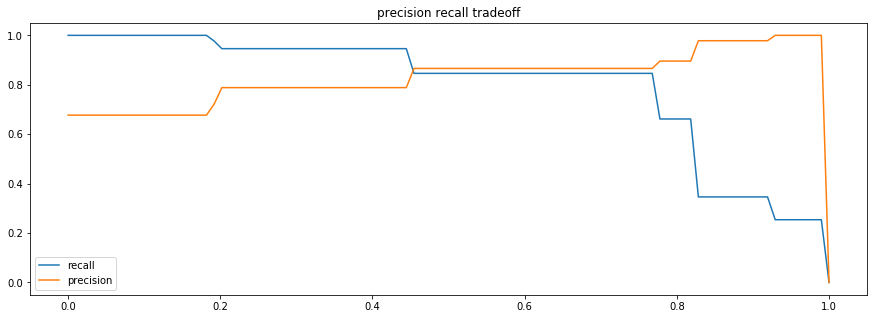

In [16]:
probs = model2.predict_proba(X_t)[:, 1]

thresholds = np.linspace(0, 1, 100)

precisions = []
recalls = []
for thresh in thresholds:
    predicted_vals = [1 if prob > thresh else 0 for prob in probs]
    precisions.append(precision_score(y, predicted_vals))
    recalls.append(recall_score(y, predicted_vals))

plt.figure(figsize=(15, 5))
plt.plot(thresholds, recalls, label="recall")
plt.plot(thresholds, precisions, label="precision")
plt.title("precision recall tradeoff")
plt.legend()
plt.show()

It seems the best threshold is around 0.15

In [17]:
probs = model2.predict_proba(X_t)[:, 1]
train_pred = [1 if prob > 0.15 else 0 for prob in probs]

probs = model2.predict_proba(X_val_t)[:, 1]
y_pred = [1 if prob > 0.15 else 0 for prob in probs]

print("training scores")
print(classification_report(y, train_pred))
print('\n validation scores')
print(classification_report(y_val, y_pred))

training scores
              precision    recall  f1-score   support

           0       1.00      0.46      0.63       114
           1       0.68      1.00      0.81       130

    accuracy                           0.75       244
   macro avg       0.84      0.73      0.72       244
weighted avg       0.83      0.75      0.72       244


 validation scores
              precision    recall  f1-score   support

           0       0.50      0.12      0.20         8
           1       0.73      0.95      0.83        20

    accuracy                           0.71        28
   macro avg       0.62      0.54      0.51        28
weighted avg       0.66      0.71      0.65        28

